<a href="https://colab.research.google.com/github/DanielCadavid/InteligenciaArtificial/blob/main/aprendizajesupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizaje Supervisado


> A continuacion se presenta una implementacion de Algoritmos de clasificacion

##Regresion Lineal
Instalacion de Libreria



In [1]:
!pip3 install mglearn

Para demostrar el funcionamiento de la regresion lineal, se trae un set de datos "wave"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


w[0]: 0.393906  b: -0.031804


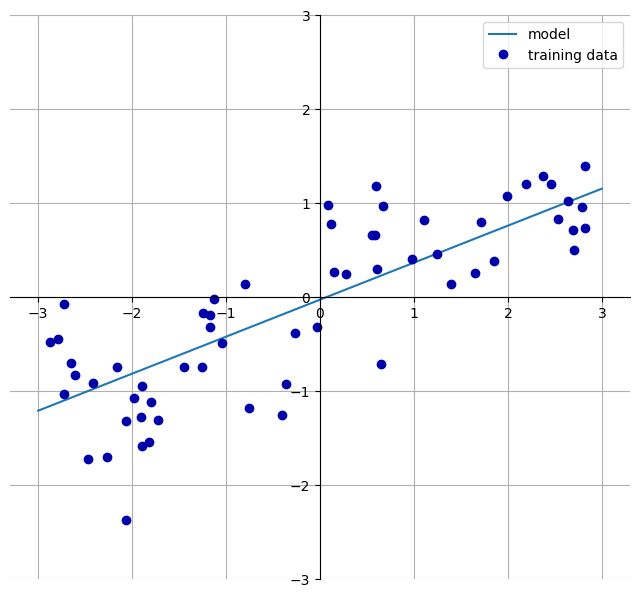

In [3]:
mglearn.plots.plot_linear_regression_wave()

La variable "lr.coef" posee el valor de los pesos en un arreglo de tipo NumPy, mientras "lr.intercept" almacena el valor del intercepto con el eje y



Ahora se mostraran los resultados de entrenamiento y prueba

In [4]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


La regresion lineal tiene como objetivo encontrar los parametros de las variables que minimicen el error cuadratico entre las predicciones y el objetivo de la regresion.
El 66% no es un buen porcentaje en los entrenamientos, ademas se puede observar una minima diferencia frente a las pruebas. Lo que indica un desajuste o falta de datos, Por lo que vamos a ver un segundo ejemplo con un set de datos mas grande y con mas caracteristicas

In [5]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


El set de datos "Boston Housing" ha construido un modelo que muestra clara diferencia entre los valores de Entrenamiento (el cual mejoro al introducirle un set mas robusto) y los de Prueba, lo que lleva a deducir que hay un sobrellenado de informacion. El modelo de regresion lineal presenta ciertas fallas en cuanto al volumen y el control de la complejidad. Por ello se dictamina a la regresion ridge como una mejor opcion

##Modelo Linear de Regresion Ridge
Luego de traer el codigo al set de datos "Boston Housing", se obtienen resultados mas cercanos al 100%

In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


El siguiente codigo muestra graficamente la aproximacion de dichos modelos

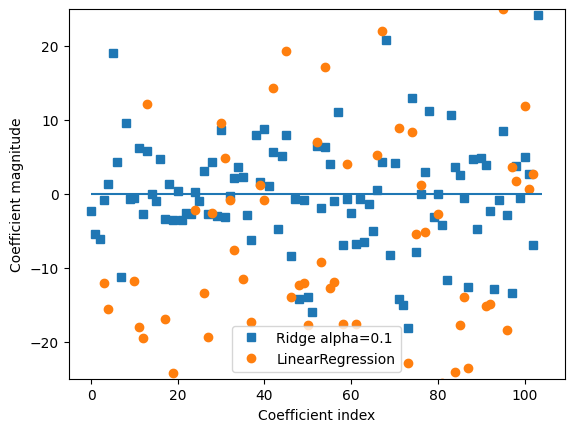

In [7]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

En la siguiente grafica se muestra el desempeno de la regresion lineal y el modelo ridge, donde la regrsion lineal necesita al menos 400 entradas para aprender algo

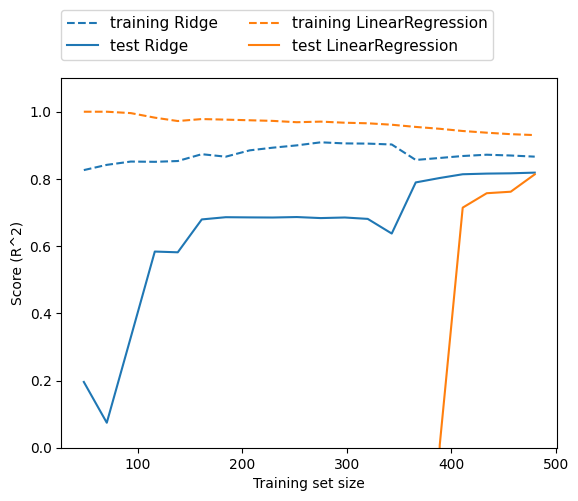

In [8]:
mglearn.plots.plot_ridge_n_samples()

##Regresion Logistica
###1. Introduccion

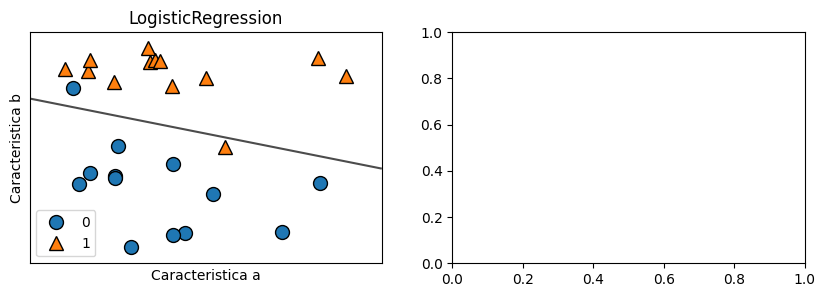

In [9]:
from sklearn.linear_model import LogisticRegression
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10, 3))
for model, ax in zip([LogisticRegression()], axes):
  clf = model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
  ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Caracteristica a")
  ax.set_ylabel("Caracteristica b")
  axes[0].legend()

La regresion logistica tiene como caracteristica la separacion del area mediante una linea, separandolas en 1 para el area superior, y 0 para el area inferior.
Ademas esta funcion tiene un parametro definido como "C", altos valores para intentar desarrollarlo lo mas parecido posible, mientras que un valor pequeno.Ej: C = 0.0001, la creacion del modelo sera centrada a encontrar que el coeficiente del vector (w) sea lo mas cercano a 0
####Ejemplo




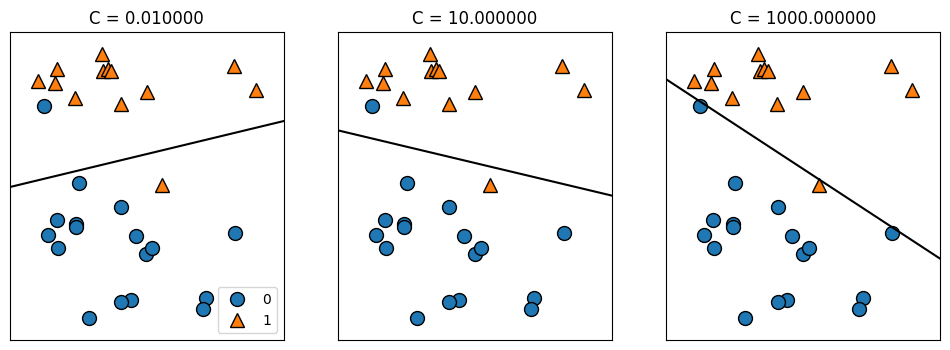

In [10]:
mglearn.plots.plot_linear_svc_regularization()

###2. Desarrollo Aplicado
Para Analizar la regresion logistica se utiliza el set de datos "Breast Cancer"
>Posterior a la ejecucion la variable C esta definida en "1", y se puede ver los porcentajes de alrededor del 95%

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>Luego se ejecuta un modelo con C=100, y muestra mejor precision en el desarrollo

In [29]:
logreg100 = LogisticRegression(C=69).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.941
Test set score: 0.965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> Y si por el contrario C tiene un valor menor, se evidencia una precision mas baja en el modelo

In [13]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>El siguiente codigo grafica los diferentes modelos con variaciones en "C"
###CONCLUSION
Un Valor mas alto de "C" obtendra un analisis mas parecido a la funcion a imitar, y un valor menor se ajustara a la clasificacion

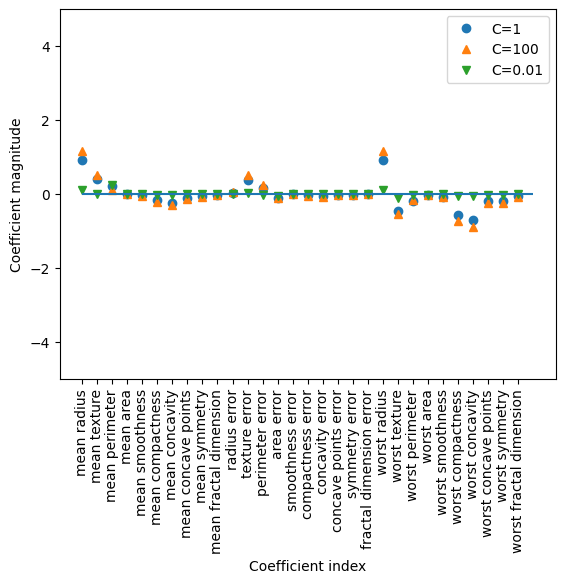

In [14]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()